In [1]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

device = 'cuda'

XOR_DATA = [[0, 0], [1, 0], [0, 1], [1, 1]]
XOR_TARGETS = [[0], [1], [1], [0]]

X = torch.tensor(XOR_DATA, dtype=torch.float32).to(device)
Y = torch.tensor(XOR_TARGETS, dtype=torch.float32).to(device)


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(2, 2, bias=True),
            nn.Sigmoid(),
            nn.Linear(2, 1, bias=True),
            nn.Sigmoid()
        ).to(device)

    def forward(self, x):
        return self.layers(x)


torch.manual_seed(42)
#trainloader = torch.utils.data.DataLoader(list(zip(X, Y)), batch_size=1)
#mlp = MLP()
#
#loss_function = nn.MSELoss().to(device)
#optimizer = torch.optim.SGD(mlp.parameters(), lr=0.1)
#
#for epoch in range(0, 10000):
#    current_loss = 0.0
#    for i, data in enumerate(trainloader, 0):
#        inputs, targets = data
#        optimizer.zero_grad()
#        outputs = mlp(inputs)
#        loss = loss_function(outputs, targets)
#        loss.backward()
#        optimizer.step()
#        current_loss += loss.item()
#
#print(mlp.forward(X))
#print('Training process has finished')

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 2, bias=False),
            nn.Sigmoid(),
            nn.Linear(2, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 20, bias=False)
        ).to(device)

    def forward(self, x):
        return self.layers(x)


X = (5, 10)
Y = (20, 25)

training_samples = []
for i in range(200):
    training_samples.append([random.uniform(X[0], X[1]), random.uniform(Y[0], Y[1])])

transformed_data = []

for i in range(0, 200, 10):
    sample = training_samples[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    transformed_data.append(t_data)

transformed_data = torch.tensor(transformed_data, dtype=torch.float32).to(device)
train_loader = torch.utils.data.DataLoader(list(zip(transformed_data, transformed_data)), batch_size=1)
loss_function = nn.L1Loss(reduction='sum').to(device)
ae = AutoEncoder()
optimizer = torch.optim.SGD(ae.parameters(), lr=0.001)
losses = []
for epoch in range(0, 20):
    current_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = ae(inputs)
        loss = loss_function(outputs, targets) * loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
    losses.append(current_loss)

b = transformed_data[0]
print(b)
a = ae.forward(transformed_data[0])
print(a)
print(loss_function(a, b))

second_x = []
second_y = []
for d in transformed_data:
    s = ae.forward(d).cpu().detach().numpy()
    for i in range(0, 20, 2):
        second_x.append(s[i])
        second_y.append(s[i + 1])

print(second_y)
print(second_x)

tensor([ 7.8531, 22.8285,  9.7217, 23.7390,  8.9881, 23.7160,  8.5335, 21.0932,
         6.4666, 23.3894,  5.5248, 24.0673,  7.1923, 20.4680,  6.7597, 20.6041,
         5.6936, 24.8482,  9.2946, 21.3533], device='cuda:0')
tensor([ 8.2092, 21.3915,  6.4693, 20.9130,  8.4965, 20.4429,  8.4477, 21.8522,
         6.7462, 22.9077,  8.5560, 23.2308,  7.2165, 23.9227,  7.0573, 23.7022,
         6.7426, 25.2222,  7.8221, 22.7310], device='cuda:0',
       grad_fn=<SqueezeBackward4>)
tensor(28.2578, device='cuda:0', grad_fn=<SumBackward0>)
[21.391525, 20.912952, 20.442932, 21.852205, 22.907742, 23.230783, 23.922684, 23.702179, 25.222218, 22.730999, 21.391483, 20.912918, 20.442894, 21.852163, 22.907696, 23.230736, 23.922636, 23.70213, 25.22216, 22.730957, 21.391472, 20.912907, 20.442883, 21.852152, 22.907684, 23.230722, 23.922625, 23.702116, 25.222143, 22.730946, 21.391586, 20.913006, 20.44299, 21.852264, 22.90781, 23.23085, 23.92275, 23.702248, 25.222298, 22.73106, 21.39154, 20.912968, 20.442947

[[7.85312129710732, 22.828463942568685], [9.721667423559685, 23.738973509815846], [8.98814723697097, 23.71604778009852], [8.533494167704134, 21.09315594501137], [6.466605843932577, 23.38935972694047], [5.5247913901556505, 24.067340506903648], [7.192328400845955, 20.46796222120144], [6.75970658926841, 20.604108071675327], [5.6936253299303665, 24.84821071060165], [9.294609880694807, 21.353343430132433], [5.110543517174264, 22.16440946057905], [7.346866969708162, 21.834672964536296], [8.64265630208208, 23.70782970459894], [8.224394370392545, 23.07359502181647], [8.201630526534888, 21.809375260813834], [6.609584522810902, 23.75099021926711], [6.237942626227242, 21.781447525651384], [5.30541042682813, 22.288845346151362], [5.295188312600096, 20.64844091791755], [5.655222600002959, 21.986810874692484], [6.008888427091417, 22.387018795711633], [7.96399049982988, 22.05982361082063], [8.95864598495692, 20.454098177871728], [5.6152357791922265, 20.56180541921745], [9.835611887588618, 23.86374064

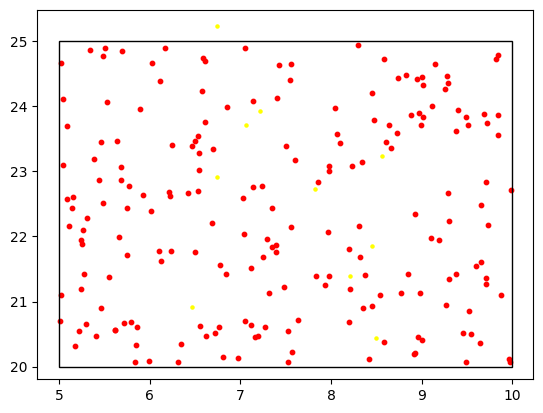

In [3]:
figure, axes = plt.subplots()
#axes.set(xlim=(5, 10), ylim=(20, 25))
uc_3 = plt.Rectangle((5, 20), 5, 5, fill=False)
print(training_samples)
points_1 = plt.scatter(list(map(lambda z: z[0], list(training_samples))), list(map(lambda z: z[1], list(training_samples))),
                       color="red", s=10)
points_2 = plt.scatter(second_x[0:10], second_y[0:10],
                       color="yellow", s=5)
axes.add_artist(uc_3)
plt.show()

In [4]:
class DeepSVDD(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 2, bias=False)
        ).to(device)

    def forward(self, x):
        return self.layers(x)



# First copy weights from autoencoder to DeepSVDD network
dsvdd = DeepSVDD()
net_dict = dsvdd.state_dict()
ae_dict = ae.state_dict()
ae_dict = {k: v for k, v in ae_dict.items() if k in net_dict}
net_dict.update(ae_dict)
dsvdd.load_state_dict(net_dict)




<All keys matched successfully>

In [5]:
# Then get center value c
c = torch.tensor([0,0],dtype=torch.float32, device=device)
with torch.no_grad():
    for x in transformed_data:
        c += dsvdd.forward(x)

    c /= len(transformed_data)

print(c)


tensor([-0.7201, -0.4168], device='cuda:0')


In [6]:
from numpy import sqrt, quantile
R = torch.tensor(0, dtype=torch.float32, device=device)
optimizer = torch.optim.SGD(dsvdd.parameters(), lr=0.01)
train_loader = torch.utils.data.DataLoader(list(zip(transformed_data, transformed_data)), batch_size=1)
warmup_epoch = 5
nu = 0.1

losses = []

for epoch in range(500):
    for data in train_loader:
        inputs, targets = data
        optimizer.zero_grad()
        outputs = dsvdd.forward(inputs)
        dist = torch.sum((outputs - c) ** 2, dim=1)
        loss = torch.mean(dist)
        loss.backward()
        losses.append(loss)
        optimizer.step()
        if epoch >= warmup_epoch:
            R = torch.tensor(quantile(sqrt(dist.clone().data.cpu().numpy()), 1 - nu))


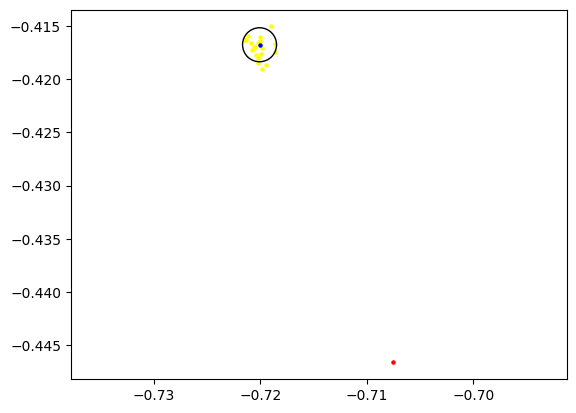

In [7]:
figure, axes = plt.subplots()
uc_3 = plt.Circle(c, R,fill=False)

new_x = []
new_y = []

for data in transformed_data:
    map = dsvdd.forward(data).cpu().detach().numpy()
    new_x.append(map[0])
    new_y.append(map[1])


anomalous = transformed_data[0].cpu().detach().numpy()

anomalous[0] = random.random() * 20
anomalous[1] = random.random() * 15
anomalous = torch.tensor(anomalous, dtype=torch.float32, device=device)
an  = dsvdd.forward(anomalous).cpu().detach().numpy()
center = c.cpu().detach().numpy()
points_2 = plt.scatter(new_x, new_y,
                       color="yellow", s=5)
plt.scatter(an[0], an[1],
            color="red", s=5)
plt.scatter(center[0], center[1],
            color="blue", s=5)
axes.add_artist(uc_3)
plt.axis('equal')
plt.show()


In [8]:
for epoch in range(500):
    for data in train_loader:
        inputs, targets = data
        optimizer.zero_grad()
        outputs = dsvdd.forward(inputs)
        dist = torch.sum((outputs - c) ** 2, dim=1)
        loss = torch.mean(dist)
        loss.backward()
        losses.append(loss)
        optimizer.step()


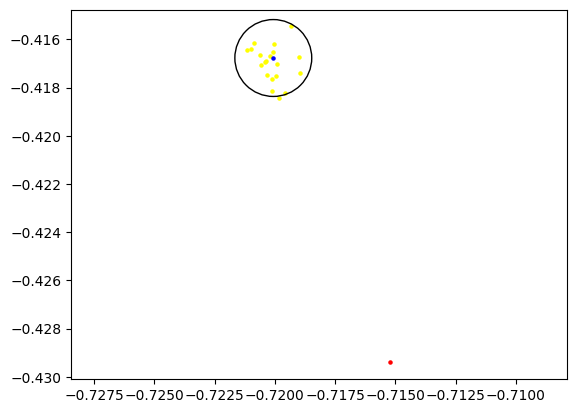

In [9]:
figure, axes = plt.subplots()
uc_3 = plt.Circle(c, R,fill=False)

new_x = []
new_y = []

for data in transformed_data:
    map = dsvdd.forward(data).cpu().detach().numpy()
    new_x.append(map[0])
    new_y.append(map[1])


anomalous = transformed_data[0].cpu().detach().numpy()

anomalous[0] = random.random() * 20
anomalous[1] = random.random() * 15
anomalous = torch.tensor(anomalous, dtype=torch.float32, device=device)
an  = dsvdd.forward(anomalous).cpu().detach().numpy()
center = c.cpu().detach().numpy()
points_2 = plt.scatter(new_x, new_y,
                       color="yellow", s=5)
plt.scatter(an[0], an[1],
            color="red", s=5)
plt.scatter(center[0], center[1],
            color="blue", s=5)
axes.add_artist(uc_3)
plt.axis('equal')
plt.show()